In [ ]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/BonusProblems/Module2/type1a_sne.csv
"""

# The Expansion of the Universe

In the early 20th Century, astronomers made a surprising discovery about the Universe that we're going to explore here. Astronomer's were keenly interested in measuring the distances to "spiral nebulae" to understand whether they were a part of our galaxy, or extra-galactic (they would turn out to be extra-galaxies - separate galaxies on their own!), and at the same time were able to measure how fast those galaxies were moving towards or away from us.

Let's recreate the now famous work of Edwin Hubble, who plotted the distances and velocities of those galaxies against eachother. In this directory there is a file called "type1a_sne.csv" that has the measured distances (in units of mega-parsecs) and velocities (in km s$^{-1}$) for a number of galaxies. Load those data in to two lists:

In [2]:
import numpy

data = numpy.loadtxt("type1a_sne.csv", delimiter=",")

distances = data[:,0]
velocities = data[:,1]

Now, make a plot with distance on the x-axis any velocity on the y-axis. Make sure to include nice axes labels! In this dataset, a negative velocity means that the galaxy is moving towards us, and a positive velocity mean that the galaxy is moving away from us. What do you notice?

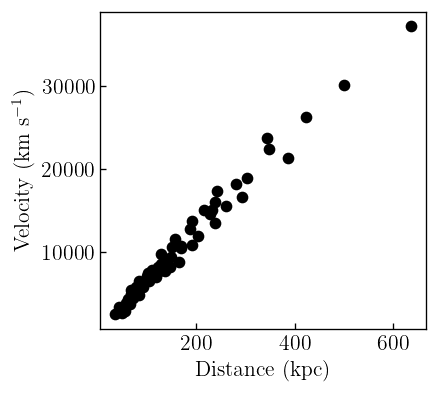

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.plot(distances, velocities, "ko")

ax.set_xlabel("Distance (kpc)", fontsize=13)
ax.set_ylabel("Velocity (km s$^{-1}$)", fontsize=13)

ax.tick_params("both", labelsize=13)

This is what Hubble discovered back in 1929 - all galaxies, regardless of where you look (outside of a few particularly close ones), are moving away from us. What this means is that our Universe is expanding!

Let's calculate how quickly the Universe is expanding from this data. The way we are going to do that is by drawing a line that fits through all of the data points. The value of the slope of that line is the "Hubble Constant". First, we need to create the x and y values for the line:

In [12]:
# Create an array with x values to draw the line at.
x = numpy.linspace(0,700,1000)

# Define a function that takes two arguments, the slope and an x value, and returns
# the y value for the line y = m * x.
def line_model(x, m):
    return m*x

# Finally, apply the function you created to your x values to create an array of y values at
# those x values.
y = line_model(x, 60)


Now, let's re-make your plot of galaxy distances versus galaxy velocities from above. Then, also plot the line you created above on it. Does the line go through the data? If not, adjust the value of the slope until it does:

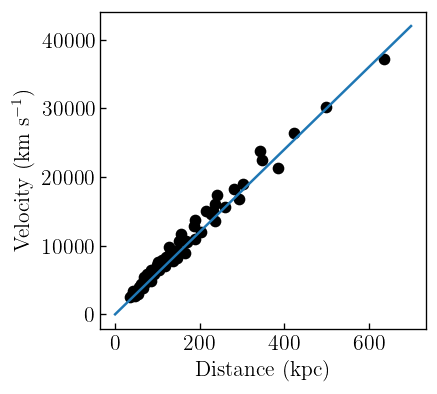

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.plot(distances, velocities, "ko")
ax.plot(x, y, "-")

ax.set_xlabel("Distance (kpc)", fontsize=13)
ax.set_ylabel("Velocity (km s$^{-1}$)", fontsize=13)

ax.tick_params("both", labelsize=13)

Let's record the value of the slope that makes the line fit through the data. This is your Hubble Constant:

In [ ]:
H0 = 60

What are the units of the Hubble Constant? You might notice that they are (distance)/(time)/(distance), or to simplify, 1/time, or a rate. What this means, then, is that $1/H_0$ has units of (time), i.e. it's a measurement of how *old* the Universe is and is called the Hubble Time. Calculate the age of the Universe using your Hubble Constant:

In [30]:
# Pay attention to units!

km = 1e5 # cm
pc = 3.086e18 # cm
Mpc = 1.0e6*pc # cm

year = 3.154e7 # s

H0 = 60 * km/Mpc # 1/s

age = 1./H0 / year

print("Age of the Universe: {0:7.2e} years".format(age))

Age of the Universe: 1.63e+10 years


The Hubble Time is an estimate of the age of a Universe that _has no matter in it_. We know that this isn't the case because we are sitting here today. For a Universe with matter in it, the gravity from that matter tends to counter the expansion of the Universe and slow it down. A more detailed calculation shows that for a Universe with the exact right amount of matter such that the Universe ends up coasting at a constant speed, the age of the Universe is more accurately calculated as $2/(3\,H_0)$:

<img src="expanding_universe.png">

Use that formula to calculate a more accurate age of the Universe from your Hubble Constant:

In [31]:
corrected_age = 2./3*age

print("Age of the Universe: {0:7.2e} years".format(corrected_age))

Age of the Universe: 1.09e+10 years


This is one of a few different ways to calculate the age of the Universe, and our current best measurement from the Planck satellite is 13.8 billion years, and their Hubble constant is about 68 km/s/Mpc. How do your numbers compare?

If you numbers are different, you aren't alone! It turns out one of the interesting problems in astronomy today is that different ways of measuring the Hubble Constant get slightly different answers. 

<img src="freedman.png">

Although the differences are small, they are also significant. Why are they different? One comes from distances to galaxies, in the same way that you calculated the Hubble Constant here. The other comes from density fluctuations in the early universe when it was only 380,000 years old (cool!). Maybe there's some physics we don't understand creating the discrepancy. Or, maybe we are systematically measuring something incorrectly and we just don't know. Stay tuned!